In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from matplotlib import pyplot as plt

from sklearn import model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

import gzip

import copy

import import_ipynb
from _My_Functions import null_cols, rmse

importing Jupyter notebook from _My_Functions.ipynb


In [2]:
acc_1_train_basicimputation = pd.read_csv("acc_1_train_basicimputation.csv.gz",
                                    compression='gzip',
                                    header=0,
                                    sep=',',
                                    quotechar='"')

target_1_train_basicimputation = pd.read_csv("target_1_train_basicimputation.csv.gz",
                                compression='gzip',
                                header=0,
                                sep=',',
                                quotechar='"')

acc_1_train_downsample = pd.read_csv("acc_1_train_downsample.csv.gz",
                                      compression='gzip',
                                      header=0,
                                      sep=',',
                                      quotechar='"')

acc_1_train_downsample_nogrades = pd.read_csv("acc_1_train_downsample_nogrades.csv.gz",
                                              compression='gzip',
                                              header=0,
                                              sep=',',
                                              quotechar='"')

target_1_train_downsample = pd.read_csv("target_1_train_downsample.csv.gz",
                                         compression='gzip',
                                         header=0,
                                         sep=',',
                                         quotechar='"')

In [3]:
# separate and drop 'total_pymnt'

ttlpy_1_train_basicimputation = copy.deepcopy(acc_1_train_basicimputation[['total_pymnt']])

acc_1_train_basicimputation = acc_1_train_basicimputation.drop('total_pymnt', axis=1)

acc_1_train_basicimputation

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_act_il,mths_since_rcnt_il,total_bal_il,il_util,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,duration_of_credit_months,fico_score,sec_app_fico_score,sec_app_duration_of_credit_months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,issue_d_Apr-2009,issue_d_Apr-2010,issue_d_Apr-2011,issue_d_Apr-2012,issue_d_Apr-2013,issue_d_Apr-2014,issue_d_Apr-2015,issue_d_Apr-2016,issue_d_Apr-2017,issue_d_Apr-2018,issue_d_Aug-2007,issue_d_Aug-2008,issue_d_Aug-2009,issue_d_Aug-2010,issue_d_Aug-2011,issue_d_Aug-2012,issue_d_Aug-2013,issue_d_Aug-2014,issue_d_Aug-2015,issue_d_Aug-2016,issue_d_Aug-2017,issue_d_Aug-2018,issue_d_Dec-2007,issue_d_Dec-2008,issue_d_Dec-2009,issue_d_Dec-2010,issue_d_Dec-2011,issue_d_Dec-2012,issue_d_Dec-2013,issue_d_Dec-2014,issue_d_Dec-2015,issue_d_Dec-2016,issue_d_Dec-2017,issue_d_Dec-2018,issue_d_Feb-2008,issue_d_Feb-2009,issue_d_Feb-2010,issue_d_Feb-2011,issue_d_Feb-2012,issue_d_Feb-2013,issue_d_Feb-2014,issue_d_Feb-2015,issue_d_Feb-2016,issue_d_Feb-2017,issue_d_Feb-2018,issue_d_Jan-2008,issue_d_Jan-2009,issue_d_Jan-2010,issue_d_Jan-2011,issue_d_Jan-2012,issue_d_Jan-2013,issue_d_Jan-2014,issue_d_Jan-2015,issue_d_Jan-2016,issue_d_Jan-2017,issue_d_Jan-2018,issue_d_Jul-2007,issue_d_Jul-2008,issue_d_Jul-2009,issue_d_Jul-2010,issue_d_Jul-2011,issue_d_Jul-2012,issue_d_Jul-2013,issue_d_Jul-2014,issue_d_Jul-2015,issue_d_Jul-2016,issue_d_Jul-2017,issue_d_Jul-2018,issue_d_Jun-2007,issue_d_Jun-2008,issue_d_Jun-2009,issue_d_Jun-2010,issue_d_Jun-2011,issue_d_Jun-2012,issue_d_Jun-2013,issue_d_Jun-2014,issue_d_Jun-2015,issue_d_Jun-2016,issue_d_Jun-2017,issue_d_Jun-2018,issue_d_Mar-2008,issue_d_Mar-2009,issue_d_Mar-2010,issue_d_Mar-2011,issue_d_Mar-2012,issue_d_Mar-2013,issue_d_Mar-2014,issue_d_Mar-2015,issue_d_Mar-2016,issue_d_Mar-2017,issue_d_Mar-2018,issue_d_May-2008,issue_d_May-2009,issue_d_May-2010,issue_d_May-2011,issue_d_May-2012,issue_d_May-2013,issue_d_May-2014,issue_d_May-2015,issue_d_May-2016,issue_d_May-2017,issue_d_May-2018,issue_d_Nov-2007,issue_d_Nov-2008,issue_d_Nov-2009,issue_d_Nov-2010,issue_d_Nov-2011,issue_d_Nov-2012,issue_d_Nov-2013,issue_d_Nov-2014,issue_d_Nov-2015,issue_d_Nov-2016,issue_d_Nov-2017,issue_d_Nov-2018,issue_d_Oct-2007,issue_d_Oct-2008,issue_d_Oct-2009,issue_d_Oct-2010,issue_d_Oct-2011,issue_d_Oct-2012,issue_d_Oct-2013,issue_d_Oct-2014,issue_d_Oct-2015,issue_d_Oct-2016,issue_d_Oct-2017,issue_d_Oct-2018,issue_d_Sep-2007,issue_d_Sep-2008,issue_d_Sep-2009,issue_d_Sep-2010,issue_d_Sep-2011,issue_d_Sep-2012,issue_d_Sep-2013,issue_d_Sep-2014,issue_d_Sep-2015,issue_d_Sep-2016,issue_d_Sep-2017,issue_d_Sep-2018,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacat

In [4]:
# same as above, but with the downsampled set
ttlpy_1_train_downsample = copy.deepcopy(acc_1_train_downsample[['total_pymnt']])

acc_1_train_downsample = acc_1_train_downsample.drop('total_pymnt', axis=1)

acc_1_train_downsample

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_act_il,mths_since_rcnt_il,total_bal_il,il_util,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,duration_of_credit_months,fico_score,sec_app_fico_score,sec_app_duration_of_credit_months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,issue_d_Apr-2009,issue_d_Apr-2010,issue_d_Apr-2011,issue_d_Apr-2012,issue_d_Apr-2013,issue_d_Apr-2014,issue_d_Apr-2015,issue_d_Apr-2016,issue_d_Apr-2017,issue_d_Apr-2018,issue_d_Aug-2007,issue_d_Aug-2008,issue_d_Aug-2009,issue_d_Aug-2010,issue_d_Aug-2011,issue_d_Aug-2012,issue_d_Aug-2013,issue_d_Aug-2014,issue_d_Aug-2015,issue_d_Aug-2016,issue_d_Aug-2017,issue_d_Aug-2018,issue_d_Dec-2007,issue_d_Dec-2008,issue_d_Dec-2009,issue_d_Dec-2010,issue_d_Dec-2011,issue_d_Dec-2012,issue_d_Dec-2013,issue_d_Dec-2014,issue_d_Dec-2015,issue_d_Dec-2016,issue_d_Dec-2017,issue_d_Dec-2018,issue_d_Feb-2008,issue_d_Feb-2009,issue_d_Feb-2010,issue_d_Feb-2011,issue_d_Feb-2012,issue_d_Feb-2013,issue_d_Feb-2014,issue_d_Feb-2015,issue_d_Feb-2016,issue_d_Feb-2017,issue_d_Feb-2018,issue_d_Jan-2008,issue_d_Jan-2009,issue_d_Jan-2010,issue_d_Jan-2011,issue_d_Jan-2012,issue_d_Jan-2013,issue_d_Jan-2014,issue_d_Jan-2015,issue_d_Jan-2016,issue_d_Jan-2017,issue_d_Jan-2018,issue_d_Jul-2007,issue_d_Jul-2008,issue_d_Jul-2009,issue_d_Jul-2010,issue_d_Jul-2011,issue_d_Jul-2012,issue_d_Jul-2013,issue_d_Jul-2014,issue_d_Jul-2015,issue_d_Jul-2016,issue_d_Jul-2017,issue_d_Jul-2018,issue_d_Jun-2007,issue_d_Jun-2008,issue_d_Jun-2009,issue_d_Jun-2010,issue_d_Jun-2011,issue_d_Jun-2012,issue_d_Jun-2013,issue_d_Jun-2014,issue_d_Jun-2015,issue_d_Jun-2016,issue_d_Jun-2017,issue_d_Jun-2018,issue_d_Mar-2008,issue_d_Mar-2009,issue_d_Mar-2010,issue_d_Mar-2011,issue_d_Mar-2012,issue_d_Mar-2013,issue_d_Mar-2014,issue_d_Mar-2015,issue_d_Mar-2016,issue_d_Mar-2017,issue_d_Mar-2018,issue_d_May-2008,issue_d_May-2009,issue_d_May-2010,issue_d_May-2011,issue_d_May-2012,issue_d_May-2013,issue_d_May-2014,issue_d_May-2015,issue_d_May-2016,issue_d_May-2017,issue_d_May-2018,issue_d_Nov-2007,issue_d_Nov-2008,issue_d_Nov-2009,issue_d_Nov-2010,issue_d_Nov-2011,issue_d_Nov-2012,issue_d_Nov-2013,issue_d_Nov-2014,issue_d_Nov-2015,issue_d_Nov-2016,issue_d_Nov-2017,issue_d_Nov-2018,issue_d_Oct-2007,issue_d_Oct-2008,issue_d_Oct-2009,issue_d_Oct-2010,issue_d_Oct-2011,issue_d_Oct-2012,issue_d_Oct-2013,issue_d_Oct-2014,issue_d_Oct-2015,issue_d_Oct-2016,issue_d_Oct-2017,issue_d_Oct-2018,issue_d_Sep-2007,issue_d_Sep-2008,issue_d_Sep-2009,issue_d_Sep-2010,issue_d_Sep-2011,issue_d_Sep-2012,issue_d_Sep-2013,issue_d_Sep-2014,issue_d_Sep-2015,issue_d_Sep-2016,issue_d_Sep-2017,issue_d_Sep-2018,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacat

In [5]:
# same as above, but with no grades dataset
ttlpy_1_train_downsample_nogrades = copy.deepcopy(acc_1_train_downsample_nogrades[['total_pymnt']])

acc_1_train_downsample_nogrades = acc_1_train_downsample_nogrades.drop('total_pymnt', axis=1)

acc_1_train_downsample_nogrades

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,verification_status,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_act_il,mths_since_rcnt_il,total_bal_il,il_util,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_mths_since_last_major_derog,duration_of_credit_months,fico_score,sec_app_fico_score,sec_app_duration_of_credit_months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,issue_d_Apr-2009,issue_d_Apr-2010,issue_d_Apr-2011,issue_d_Apr-2012,issue_d_Apr-2013,issue_d_Apr-2014,issue_d_Apr-2015,issue_d_Apr-2016,issue_d_Apr-2017,issue_d_Apr-2018,issue_d_Aug-2007,issue_d_Aug-2008,issue_d_Aug-2009,issue_d_Aug-2010,issue_d_Aug-2011,issue_d_Aug-2012,issue_d_Aug-2013,issue_d_Aug-2014,issue_d_Aug-2015,issue_d_Aug-2016,issue_d_Aug-2017,issue_d_Aug-2018,issue_d_Dec-2007,issue_d_Dec-2008,issue_d_Dec-2009,issue_d_Dec-2010,issue_d_Dec-2011,issue_d_Dec-2012,issue_d_Dec-2013,issue_d_Dec-2014,issue_d_Dec-2015,issue_d_Dec-2016,issue_d_Dec-2017,issue_d_Dec-2018,issue_d_Feb-2008,issue_d_Feb-2009,issue_d_Feb-2010,issue_d_Feb-2011,issue_d_Feb-2012,issue_d_Feb-2013,issue_d_Feb-2014,issue_d_Feb-2015,issue_d_Feb-2016,issue_d_Feb-2017,issue_d_Feb-2018,issue_d_Jan-2008,issue_d_Jan-2009,issue_d_Jan-2010,issue_d_Jan-2011,issue_d_Jan-2012,issue_d_Jan-2013,issue_d_Jan-2014,issue_d_Jan-2015,issue_d_Jan-2016,issue_d_Jan-2017,issue_d_Jan-2018,issue_d_Jul-2007,issue_d_Jul-2008,issue_d_Jul-2009,issue_d_Jul-2010,issue_d_Jul-2011,issue_d_Jul-2012,issue_d_Jul-2013,issue_d_Jul-2014,issue_d_Jul-2015,issue_d_Jul-2016,issue_d_Jul-2017,issue_d_Jul-2018,issue_d_Jun-2007,issue_d_Jun-2008,issue_d_Jun-2009,issue_d_Jun-2010,issue_d_Jun-2011,issue_d_Jun-2012,issue_d_Jun-2013,issue_d_Jun-2014,issue_d_Jun-2015,issue_d_Jun-2016,issue_d_Jun-2017,issue_d_Jun-2018,issue_d_Mar-2008,issue_d_Mar-2009,issue_d_Mar-2010,issue_d_Mar-2011,issue_d_Mar-2012,issue_d_Mar-2013,issue_d_Mar-2014,issue_d_Mar-2015,issue_d_Mar-2016,issue_d_Mar-2017,issue_d_Mar-2018,issue_d_May-2008,issue_d_May-2009,issue_d_May-2010,issue_d_May-2011,issue_d_May-2012,issue_d_May-2013,issue_d_May-2014,issue_d_May-2015,issue_d_May-2016,issue_d_May-2017,issue_d_May-2018,issue_d_Nov-2007,issue_d_Nov-2008,issue_d_Nov-2009,issue_d_Nov-2010,issue_d_Nov-2011,issue_d_Nov-2012,issue_d_Nov-2013,issue_d_Nov-2014,issue_d_Nov-2015,issue_d_Nov-2016,issue_d_Nov-2017,issue_d_Nov-2018,issue_d_Oct-2007,issue_d_Oct-2008,issue_d_Oct-2009,issue_d_Oct-2010,issue_d_Oct-2011,issue_d_Oct-2012,issue_d_Oct-2013,issue_d_Oct-2014,issue_d_Oct-2015,issue_d_Oct-2016,issue_d_Oct-2017,issue_d_Oct-2018,issue_d_Sep-2007,issue_d_Sep-2008,issue_d_Sep-2009,issue_d_Sep-2010,issue_d_Sep-2011,issue_d_Sep-2012,issue_d_Sep-2013,issue_d_Sep-2014,issue_d_Sep-2015,issue_d_Sep-2016,issue_d_Sep-2017,issue_d_Sep-2018,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedd

In [6]:
state=0

# basic imputation:
xtrain_b, xtest_b, ytrain_b, ytest_b = ms.train_test_split(acc_1_train_basicimputation,
                                                           target_1_train_basicimputation,
                                                           test_size=0.2,
                                                           random_state=state)

# Must flatten to fit
ytrain_b = ytrain_b.values.flatten()


# Downsampled:
xtrain_ds, xtest_ds, ytrain_ds, ytest_ds = ms.train_test_split(acc_1_train_downsample,
                                                               target_1_train_downsample,
                                                               test_size=0.2,
                                                               random_state=state)

# Must flatten to fit
ytrain_ds = ytrain_ds.values.flatten()


# No Grades:
xtrain_no, xtest_no, ytrain_no, ytest_no = ms.train_test_split(acc_1_train_downsample_nogrades,
                                                               target_1_train_downsample,
                                                               test_size=0.2,
                                                               random_state=state)

# Must flatten to fit
ytrain_no = ytrain_no.values.flatten()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

## Basic Imputation Data

In [7]:
logistic = LogisticRegression()

train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []


randomstate = [state]
verbose_ = [1]
njobs = [-1]

gparam_logistic = {'random_state': randomstate,
                   'verbose': verbose_,
                   'n_jobs': njobs}


gs_logistic = ms.GridSearchCV(logistic, gparam_logistic, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='roc_auc', return_train_score=True)

%time gs_logistic.fit(xtrain_b, ytrain_b)

# setting up dataframe for results
train_scores.append(gs_logistic.best_estimator_.score(xtrain_b, ytrain_b))
test_scores.append(gs_logistic.best_estimator_.score(xtest_b, ytest_b))

# add the best parameters to the df
best_par_list.append(gs_logistic.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
list_results = [train_scores, test_scores]
res_df = pd.DataFrame(list_results).T
res_df.columns = ['TrainScores', 'TestScores']
best_par_df = pd.DataFrame(best_par_list)
res_df = pd.concat([res_df, best_par_df], axis=1, sort=False)

# confusion matrix for train set
print('\n')
print('confusion matrix for train set')
print(confusion_matrix(ytrain_b, gs_logistic.predict(xtrain_b)))

# confusion matrix for test set
print('\n')
print('confusion matrix for test set')
print(confusion_matrix(ytest_b, gs_logistic.predict(xtest_b)))

res_df

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.3min finished


Wall time: 4min 50s


confusion matrix for train set
[[422541   8826]
 [ 97274  10599]]


confusion matrix for test set
[[105753   2250]
 [ 24241   2566]]


,TrainScores,TestScores,n_jobs,random_state,verbose
0,0.803242,0.803494,-1,0,1


In [8]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(ytest_b, gs_logistic.predict(xtest_b))

print('Average precision-recall score for random forest: {0:0.2f}'.format(
      average_precision))

Average precision-recall score for random forest: 0.23


Text(0.5, 1.0, '2-class Precision-Recall curve for random forest: AP=0.23')

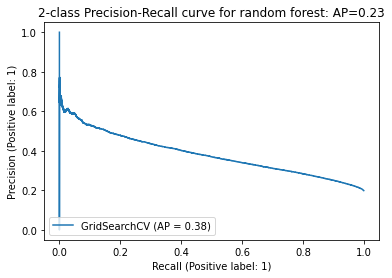

In [9]:
# Precision-Recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gs_logistic, xtest_b, ytest_b)
disp.ax_.set_title('2-class Precision-Recall curve for random forest: '
                   'AP={0:0.2f}'.format(average_precision))

In [10]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score = metrics.f1_score(ytest_b, gs_logistic.predict(xtest_b))
recall_score = metrics.recall_score(ytest_b, gs_logistic.predict(xtest_b))
precision_score = metrics.precision_score(ytest_b, gs_logistic.predict(xtest_b))
print ("Random forest performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score))
print('recall score: {0:0.2f}'.format(recall_score))
print('precision score: {0:0.2f}'.format(precision_score))

Random forest performance
----------------------------------------------------------------------
F1 score: 0.16
recall score: 0.10
precision score: 0.53


In [11]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score
print ("Random forest ROC-AUC score")
print ('-'*70)
roc_auc_score(ytest_b, gs_logistic.predict(xtest_b))

Random forest ROC-AUC score
----------------------------------------------------------------------


0.5374442560937928

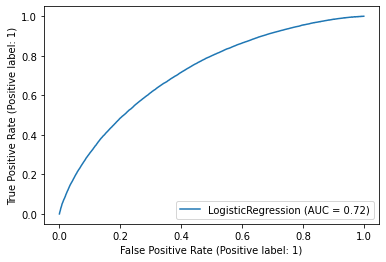

In [12]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(gs_logistic.best_estimator_, xtest_b, ytest_b) 

## Downsampled Data

In [13]:
logistic = LogisticRegression()

train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

randomstate = [state]
verbose_ = [1]
njobs = [-1]

gparam_logistic = {'random_state': randomstate,
                   'verbose': verbose_,
                   'n_jobs': njobs}

gs_logistic = ms.GridSearchCV(logistic, gparam_logistic, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='roc_auc', return_train_score=True)

%time gs_logistic.fit(xtrain_ds, ytrain_ds)

# setting up dataframe for results
train_scores.append(gs_logistic.best_estimator_.score(xtrain_ds, ytrain_ds))
test_scores.append(gs_logistic.best_estimator_.score(xtest_ds, ytest_ds))

# add the best parameters to the df
best_par_list.append(gs_logistic.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
list_results = [train_scores, test_scores]
res_df = pd.DataFrame(list_results).T
res_df.columns = ['TrainScores', 'TestScores']
best_par_df = pd.DataFrame(best_par_list)
res_df = pd.concat([res_df, best_par_df], axis=1, sort=False)

# confusion matrix for train set
print('\n')
print('confusion matrix for train set')
print(confusion_matrix(ytrain_ds, gs_logistic.predict(xtrain_ds)))

# confusion matrix for test set
print('\n')
print('confusion matrix for test set')
print(confusion_matrix(ytest_ds, gs_logistic.predict(xtest_ds)))

res_df

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.7min finished


Wall time: 1min 56s


confusion matrix for train set
[[71755 35955]
 [37425 70353]]


confusion matrix for test set
[[17941  9029]
 [ 9341 17561]]


,TrainScores,TestScores,n_jobs,random_state,verbose
0,0.659471,0.659007,-1,0,1


In [14]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(ytest_ds, gs_logistic.predict(xtest_ds))

print('Average precision-recall score for random forest: {0:0.2f}'.format(
      average_precision))

Average precision-recall score for random forest: 0.60


Text(0.5, 1.0, '2-class Precision-Recall curve for random forest: AP=0.60')

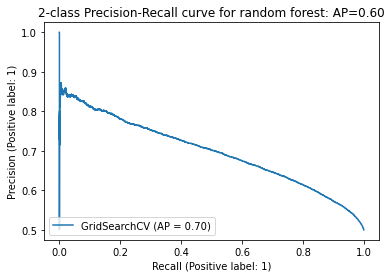

In [15]:
# Precision-Recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gs_logistic, xtest_ds, ytest_ds)
disp.ax_.set_title('2-class Precision-Recall curve for random forest: '
                   'AP={0:0.2f}'.format(average_precision))

In [16]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score = metrics.f1_score(ytest_ds, gs_logistic.predict(xtest_ds))
recall_score = metrics.recall_score(ytest_ds, gs_logistic.predict(xtest_ds))
precision_score = metrics.precision_score(ytest_ds, gs_logistic.predict(xtest_ds))
print ("Random forest performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score))
print('recall score: {0:0.2f}'.format(recall_score))
print('precision score: {0:0.2f}'.format(precision_score))

Random forest performance
----------------------------------------------------------------------
F1 score: 0.66
recall score: 0.65
precision score: 0.66


In [17]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score
print ("Random forest ROC-AUC score")
print ('-'*70)
roc_auc_score(ytest_ds, gs_logistic.predict(xtest_ds))

Random forest ROC-AUC score
----------------------------------------------------------------------


0.6589986803610528

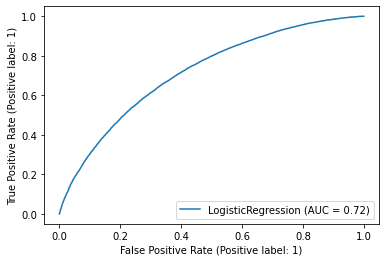

In [18]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(gs_logistic.best_estimator_, xtest_ds, ytest_ds) 

# No Grades

In [19]:
logistic = LogisticRegression()

train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

randomstate = [state]
verbose_ = [1]
njobs = [-1]

gparam_logistic = {'random_state': randomstate,
                   'verbose': verbose_,
                   'n_jobs': njobs}


gs_logistic = ms.GridSearchCV(logistic, gparam_logistic, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='roc_auc', return_train_score=True)

%time gs_logistic.fit(xtrain_no, ytrain_no)

# setting up dataframe for results
train_scores.append(gs_logistic.best_estimator_.score(xtrain_no, ytrain_no))
test_scores.append(gs_logistic.best_estimator_.score(xtest_no, ytest_no))

# add the best parameters to the df
best_par_list.append(gs_logistic.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
list_results = [train_scores, test_scores]
res_df = pd.DataFrame(list_results).T
res_df.columns = ['TrainScores', 'TestScores']
best_par_df = pd.DataFrame(best_par_list)
res_df = pd.concat([res_df, best_par_df], axis=1, sort=False)

# confusion matrix for train set
print('\n')
print('confusion matrix for train set')
print(confusion_matrix(ytrain_no, gs_logistic.predict(xtrain_no)))

# confusion matrix for test set
print('\n')
print('confusion matrix for test set')
print(confusion_matrix(ytest_no, gs_logistic.predict(xtest_no)))

res_df

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished


Wall time: 2min 2s


confusion matrix for train set
[[71942 35768]
 [37720 70058]]


confusion matrix for test set
[[17971  8999]
 [ 9404 17498]]


,TrainScores,TestScores,n_jobs,random_state,verbose
0,0.658969,0.658394,-1,0,1


- No Grades performed similarly to the dataset with grades

In [20]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(ytest_no, gs_logistic.predict(xtest_no))

print('Average precision-recall score for random forest: {0:0.2f}'.format(
      average_precision))

Average precision-recall score for random forest: 0.60


Text(0.5, 1.0, '2-class Precision-Recall curve for random forest: AP=0.60')

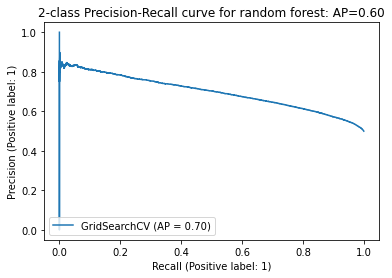

In [21]:
# Precision-Recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gs_logistic, xtest_no, ytest_no)
disp.ax_.set_title('2-class Precision-Recall curve for random forest: '
                   'AP={0:0.2f}'.format(average_precision))

In [22]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score = metrics.f1_score(ytest_no, gs_logistic.predict(xtest_no))
recall_score = metrics.recall_score(ytest_no, gs_logistic.predict(xtest_no))
precision_score = metrics.precision_score(ytest_no, gs_logistic.predict(xtest_no))
print ("Random forest performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score))
print('recall score: {0:0.2f}'.format(recall_score))
print('precision score: {0:0.2f}'.format(precision_score))

Random forest performance
----------------------------------------------------------------------
F1 score: 0.66
recall score: 0.65
precision score: 0.66


In [23]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score
print ("Random forest ROC-AUC score")
print ('-'*70)
roc_auc_score(ytest_no, gs_logistic.predict(xtest_no))

Random forest ROC-AUC score
----------------------------------------------------------------------


0.6583839372267217

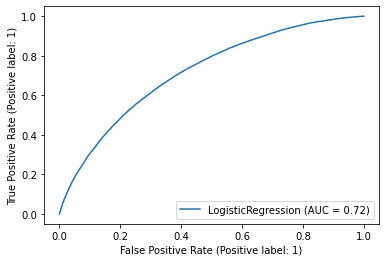

In [24]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(gs_logistic.best_estimator_, xtest_no, ytest_no) 